# Titanic Classification


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings(action="ignore")

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('survived')
categor_cols = df.select_dtypes(include=['object', 'category'])

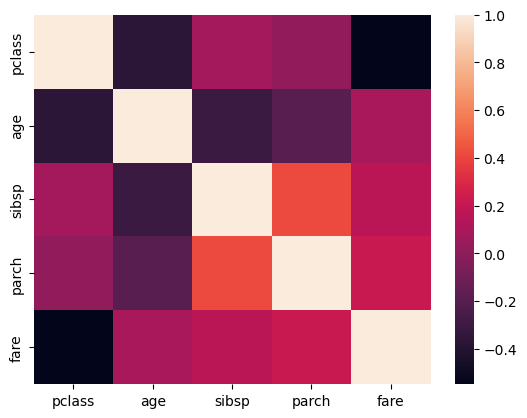

In [5]:
corr = df[numeric_cols].corr()
sns.heatmap(corr)
plt.show()

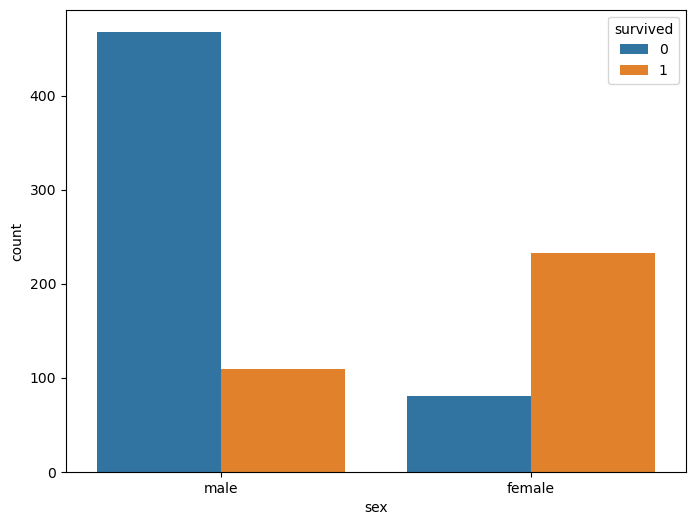

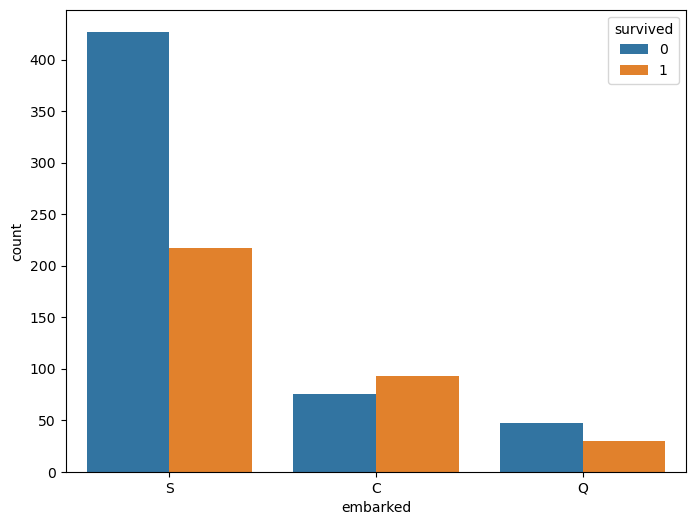

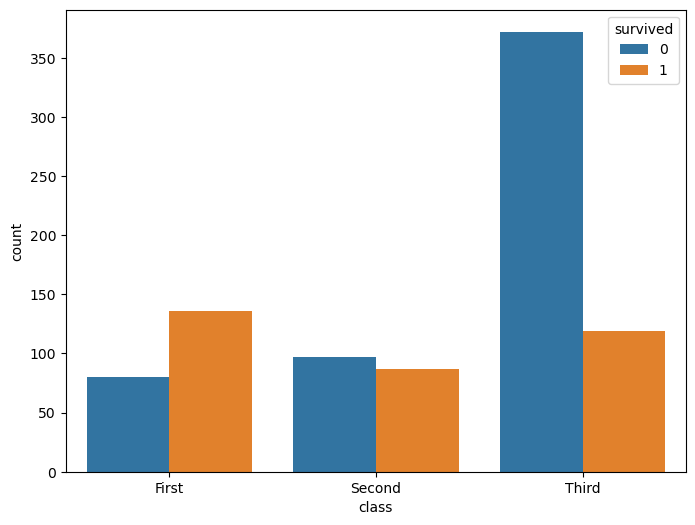

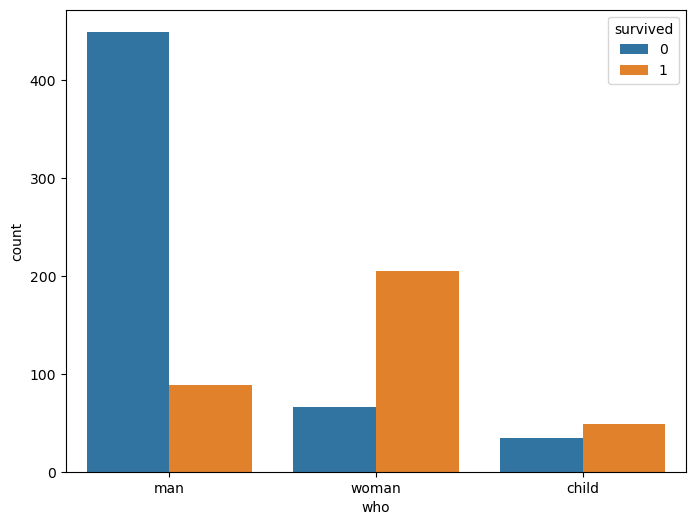

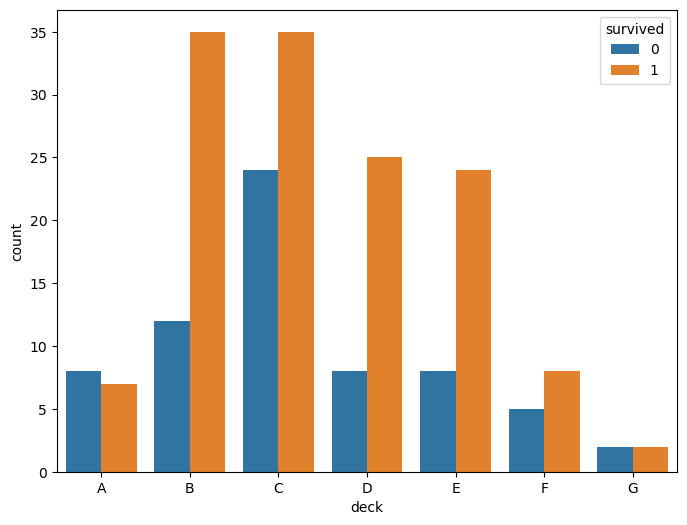

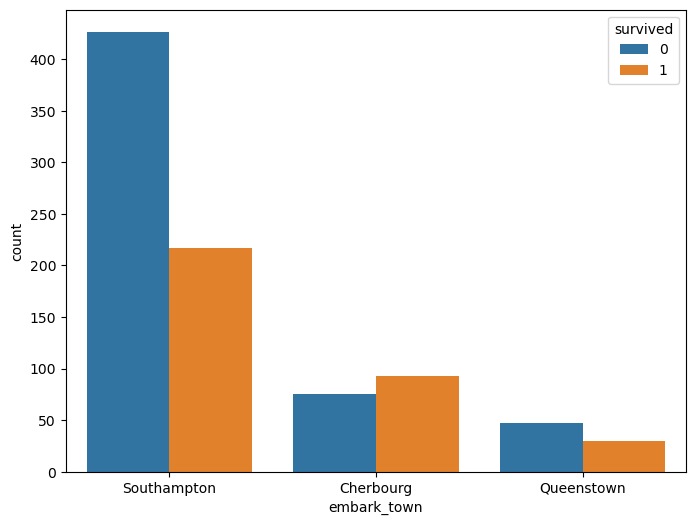

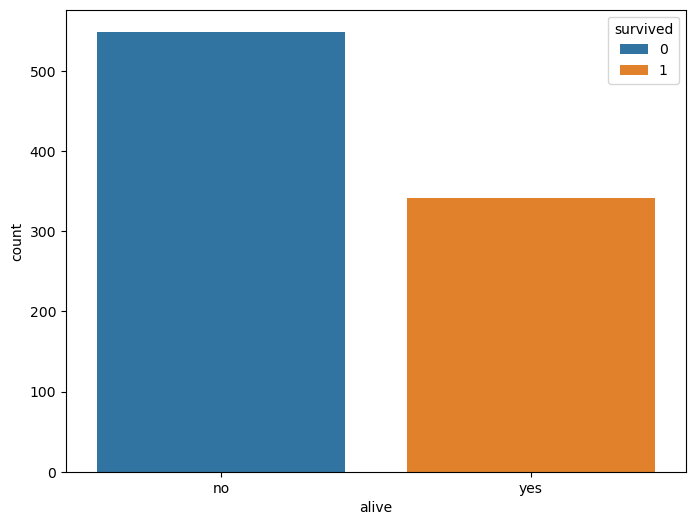

In [6]:
for col in categor_cols:
    plt.figure(figsize = (8, 6))
    sns.countplot(data = df, x = col, hue = 'survived')
    plt.show()

## 데이터 전처리 

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df['age'] = df['age'].fillna(df['age'].mode()[0])

In [9]:
df = df.drop(columns = ['deck', 'embark_town'])

In [10]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

## 범주형 변수 처리

In [15]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = OneHotEncoder()

encoder_data = encoder.fit_transform(df[categor_cols])
encoder_cols = encoder.get_feature_names_out(categor_cols)
encoded_df = pd.DataFrame(encoder_data, columns=encoder_cols)

df = df.drop(columns=[categor_cols]).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis= 1)

# encoder = LabelEncoder()

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

## 모델링

In [19]:
X = df.drop(columns = 'survived')
y = df['survived']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
cb = CatBoostClassifier()
lb = LGBMClassifier()

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    # 'learning_rate': [0.01, 0.1],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [25]:
rf_grid = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

gb_grid = GridSearchCV(gb, param_grid=param_grid, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)

cb_grid = GridSearchCV(cb, param_grid=param_grid, cv=5, scoring='accuracy')
cb_grid.fit(X_train, y_train)

lb_grid = GridSearchCV(lb, param_grid=param_grid, cv=5, scoring='accuracy')
lb_grid.fit(X_train, y_train)

ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/utils/validation.py", line 929, in check_array
    array = array.astype(new_dtype)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: 'yes'

--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 363, in fit
    X, y = self._validate_data(
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/utils/validation.py", line 929, in check_array
    array = array.astype(new_dtype)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/generic.py", line 6643, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/internals/managers.py", line 430, in astype
    return self.apply(
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/internals/managers.py", line 363, in apply
    applied = getattr(b, f)(**kwargs)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/internals/blocks.py", line 758, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/dtypes/astype.py", line 237, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/dtypes/astype.py", line 182, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/home/work/anaconda3/envs/ML/lib/python3.9/site-packages/pandas/core/dtypes/astype.py", line 133, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: 'no'
